# L1 - Graph Lab

## Group Information:

  - Author #1: Samia Anwar (anwars10@mcmaster.ca)
  - Author #2: Akshit Gulia (guliaa@mcmaster.ca)
  - Author #3: Rafeed Iqbal (iqbalr8@mcmaster.ca)

  - Gitlab URL: https://gitlab.cas.mcmaster.ca/anwars10/l1-graph-lab.git 
  - Avenue to Learn Group Name: Graph 38 

## Loading Data 

In [2]:
import csv
connectionsFile = open('_dataset/london.connections.csv')
linesFile = open('_dataset/london.lines.csv')
stationsFile = open('_dataset/london.stations.csv')

In [3]:
connectionsReader = csv.reader(connectionsFile)
linesReader = csv.reader(linesFile)
stationsReader = csv.reader(stationsFile)

In [4]:
connections = [ connection for connection in connectionsReader]
lines = [line for line in linesReader]
stations = [station for station in stationsReader]

In [5]:
del connections[0]
del lines[0]
del stations[0]

In [6]:
from Graph import Graph

In [7]:
London = Graph()

In [8]:
for station in stations: 
    London.addStation(station[0])

In [9]:
for connection in connections: 
    London.addConnection(connection[0], connection[1], connection[2], connection[3])

In [10]:
for line in lines: 
    London.addLine(line[0])

## Computing Metrics

In [13]:
nodes = London.getNumStations()
edges = London.getNumConnections()
avgDegrees = London.getAvgDegree()
print("Number of nodes: " + str(nodes))
print("Number of edges: " + str(edges))
print("Average degree per node: " + str(avgDegrees))

Number of nodes: 604
Number of edges: 406
Average degree per node: 1.3443708609271523


### Distribution of Node Degrees 

##### Creating Dataset in which x-axis is the degree, and y-axis is the number of nodes with such degree

In [17]:
degrees = London.getDegrees()

diffDegrees = set()
for i in degrees: 
    diffDegrees.add(degrees[i])

degreeQuant = dict()
for d in diffDegrees:
    degreeQuant[d] = 0

for station in degrees: 
    degreeQuant[degrees[station]] += 1 



{1, 2, 3, 4, 5, 6, 7, 8, 10, 12}
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 10: 0, 12: 0}
{1: 24, 2: 191, 3: 15, 4: 43, 5: 5, 6: 16, 7: 2, 8: 4, 10: 1, 12: 1}


##### Plotting Dataset

In [ ]:
pip install matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

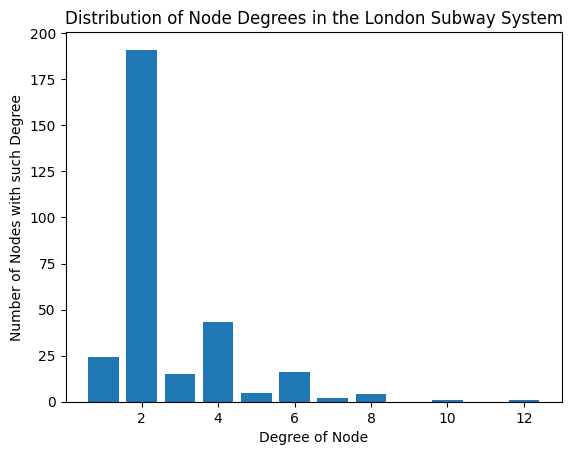

In [29]:
import matplotlib.pyplot as plt 
plt.bar(*zip(*degreeQuant.items()))
plt.xlabel('Degree of Node') 
plt.ylabel('Number of Nodes with such Degree') 
plt.title("Distribution of Node Degrees in the London Subway System")
plt.show


## Comparing Itinerary Finding Algorithms 

#### KPIs to Measure
* Number of stops, Line changes, Travel time can all be used to determine the accuracy of the path finding algorithms. Ideally a user would like a mix between the shortest travel time, and the least amount of stops/line changes <br>
* Execution time of the algorithms can be used to judge the viability of implementing one as the primary approach for a large scale deployment of the software <br>


#### Right Itineraries to Consider
Three cases can be used. Pairs of stations right next to each other and stations where one is the farthest apart from the other can be used as edge cases. For general testing and comparison, a set of pairs of stations can be used where the start and end stations are randomly chosen. Lastly, we should run the algorithms with the start and end stations swapped to compare if the route changes drastically. All outputs should be tested to see if the returned path is valid.

#### Execution Time 
In the analysis we did for both the A* and Dijkstra algorithm, we found A* to have on average a better runtime than the Dijkstra Algorithm. Also, the maximum time taken by A* was also lower than Dijkstra.


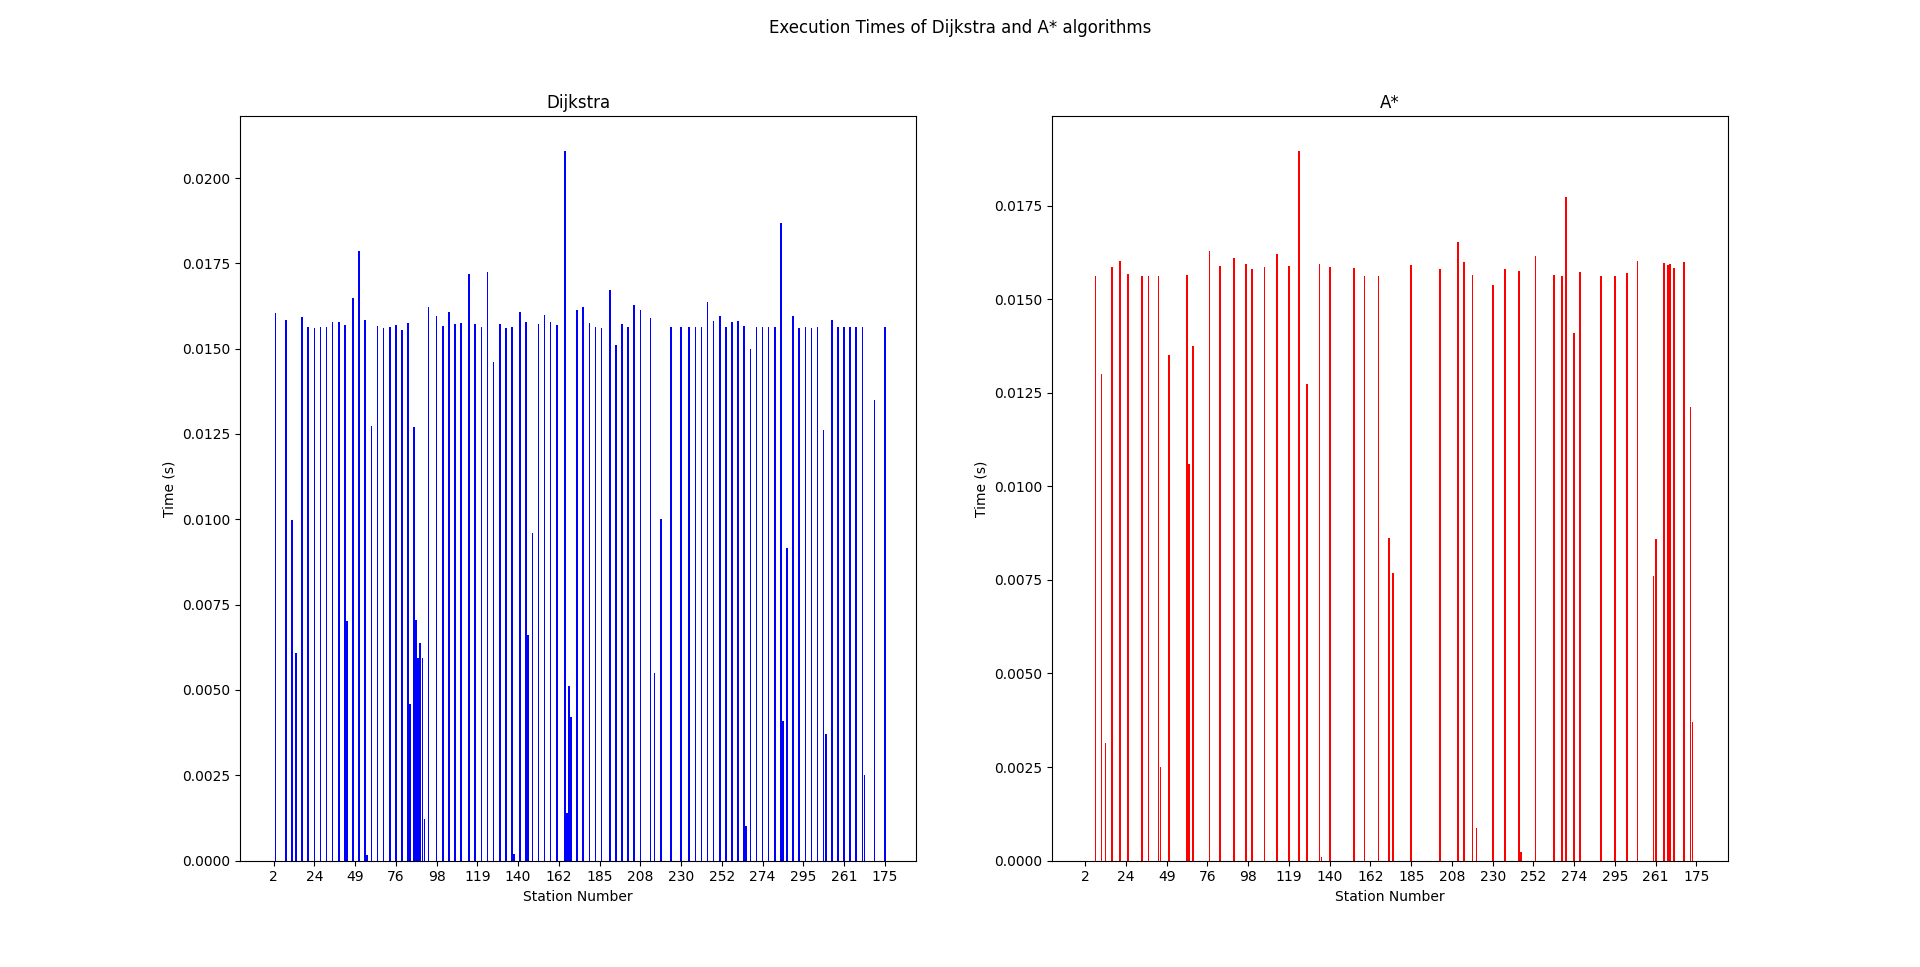

In [9]:
from IPython.display import Image
Image("img/ExecTIme.png")

#### Number of Stops
In our testing, we found that Dijkstra found paths that had less number of stops than A*. We did testing by taking station number 1 as our starting station and then finding paths to every other station

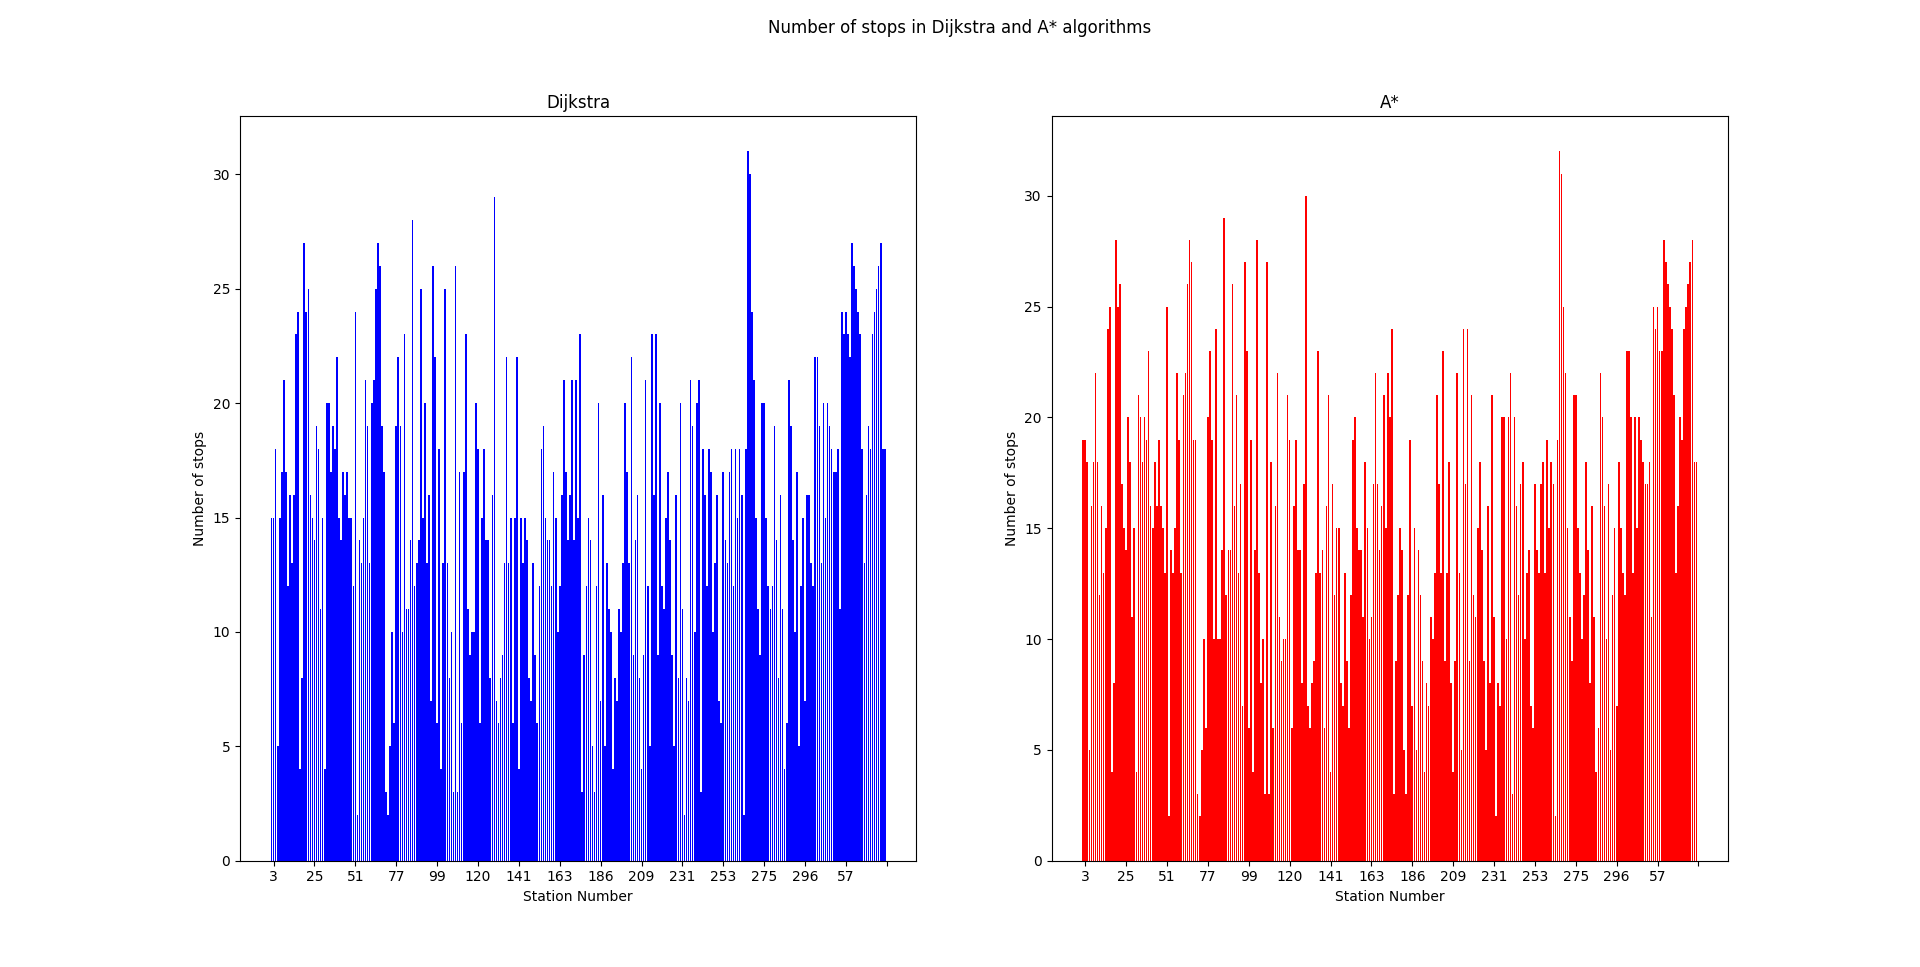

In [10]:
from IPython.display import Image
Image("img/NumStops.png")

#### Travel Times
In our testing, we found that Dijkstra found paths that had less amount of travel time than the paths that A* found. We did the testing by taking station number 1 as our starting station and then finding paths to every other station

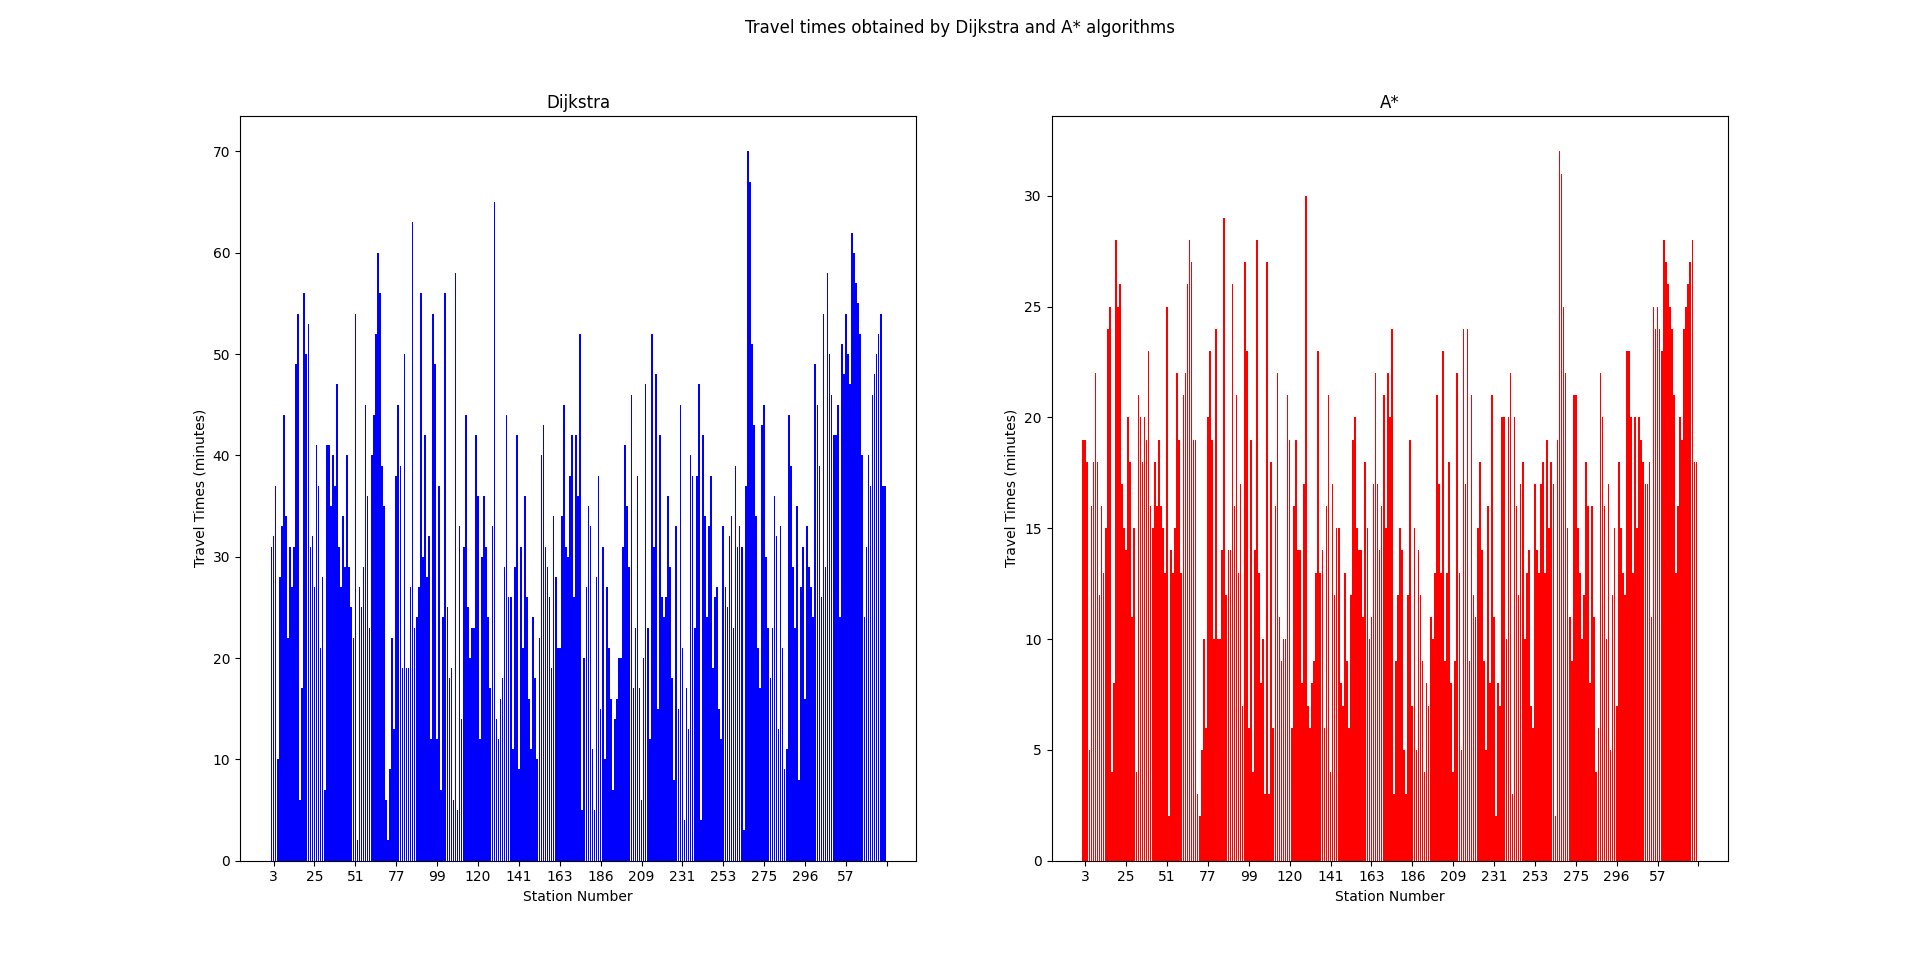

In [11]:
from IPython.display import Image
Image("img/TravelTime.png")

#### Number of Changes
In our testing, we found that Dijkstra found paths that had less number of changes than the paths that A* found. We did the testing by taking station number 1 as our starting station and then finding paths to every other station

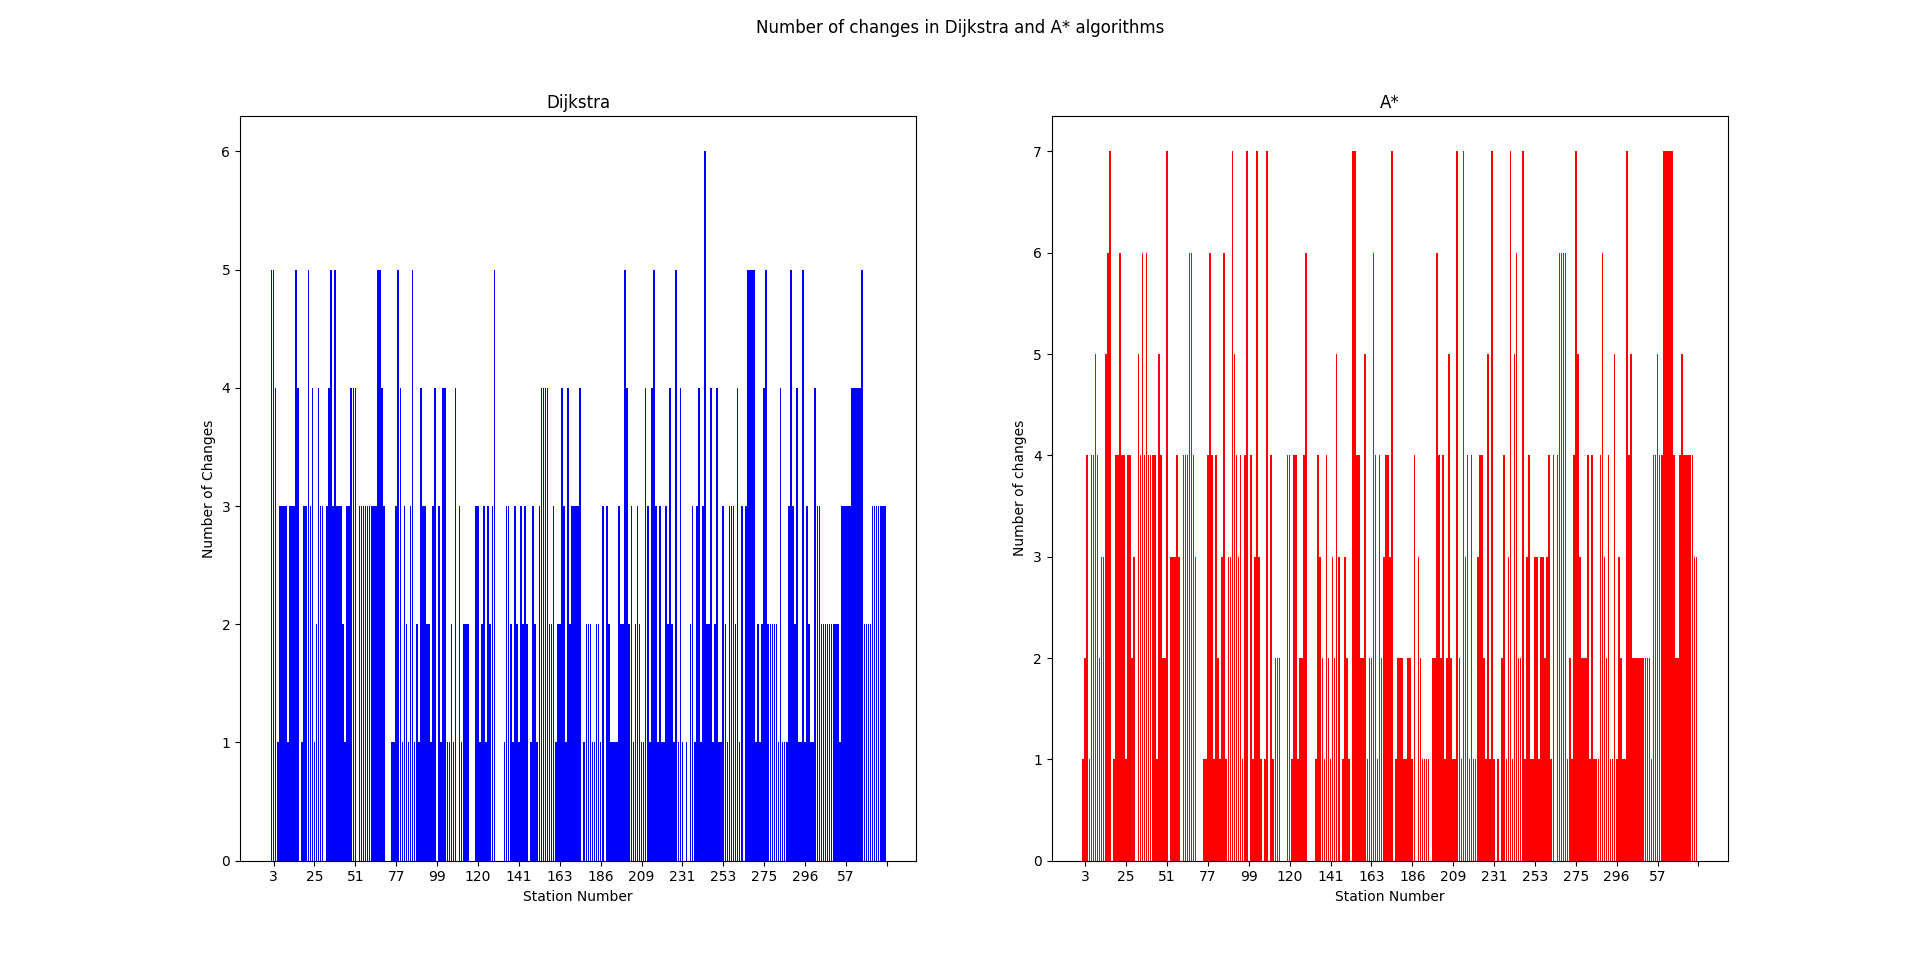

In [2]:
from IPython.display import Image
Image("img/changes.png")

## Class Diagrams 

#### Week 1

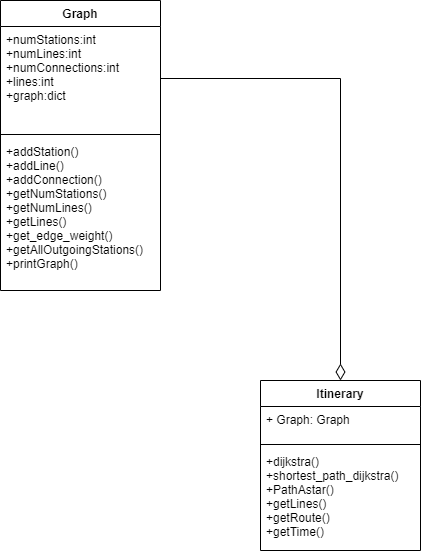

In [13]:
from IPython.display import Image
Image("img/wk1_classes.png")

##### Design Justification 
Our design attempts to adhere to the SOLID principles as well as limiting repetition and increasing modularity. <br>
i.	To Import data, we decided to use the inbuilt csv reader to pull the relevant information from the given files and our AddStation, AddConnection, AddPos, and AddLine functions use that data to create a graph as well as create a database of data relevant to our methods in the zones and itinerary class. The graph class serves the singular purpose of adding and retrieving graph data. The class add methods take only the raw data as input, making it file-type independent, leaving the pulling of the data to another class, in this case the in built csv. <br>
ii.	The itinerary class serves the sole purpose of returning Routes from a starting station to a destination station, or a set of destinations. For testing the KPIs of the itinerary generating methods there are two additional methods, getRoute, getTime. getRoute returns the validity of the paths, as well as the number of stops and changes. getTime returns the travel time of the journey. <br>
iii. For itineraries between two stations, we chose the A* algorithm as it excelled in the KPIs we decided to focus on with the least compromises. However, A* does not always return the optimal path like djikstra, which is due to it being a heuristic algorithm. We chose to use straight line distance in the heuristic in this case, but in an ideal situation we would have preferred to use the distance travelled by the trains. In an ideal situation we would have extrapolated the results and measured additional KPIs, but within the scope of this project we feel this choice was best. <br>
iv.	For itineraries between a base station and a set of required stops we settled on a heuristic approach following the nearest neighbour’s algorithm for solving the travelling salesman problem. It provides a route which is always less than 1.5 times the optimal travel time which would be achieved with a dynamic programming approach but at a fraction of the computational and space complexity. This makes this approach infinitely more scalable and makes the usage feasible for a set of 20+ destinations. Caching could be used but in real life connections are always changing due to maintenance and disruptions, so caching would also be infeasible. <br>


#### Week 2

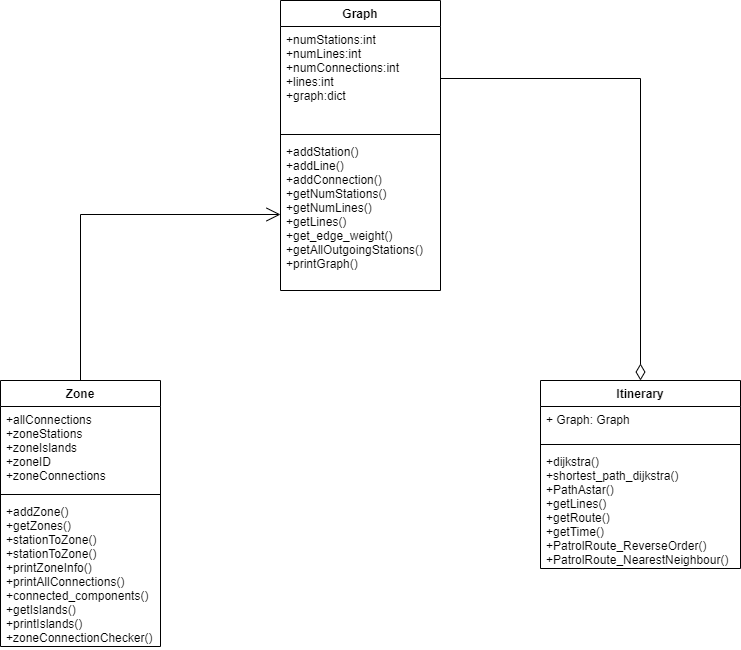

In [12]:
from IPython.display import Image
Image("img/wk2_classes.png")

##### Design Justification 
Modularity and SOLID3 principles were adhered to in creating the methods to implement the Zones class which gives additional attributes to the graph. This class was modular because every method had a distinct and singular purpose. For example, the makeIslands() method implemented only the singular task of populating the zoneIslands variable with the appropriate values whereas the connectedComponents() method was used to extract what these values were and implement the recursive logic behind finding islands within a graph. Thus, the single responsibility principle was also followed. Furthermore, the way that the variables have been instantiated allows the program to be open for extension but closed for alterations to the existing implementation. Clients are not made to depend on methods that they do not use, thus following the interfacing principle and finally, 



##### Addendum 
Throughout the project we have strived to adhere to SOLID and DRY, however the readability of the code could be improved to optimise the maintainability of the code. We could also provide more comprehensive documentation and comments. Another approach we could have taken is to separate the business logic from the interface code, but were not able to due to a lack of time. 

## Traveling Salesman 

#### Theoretical Performance
Big O Analysis: O(N^2 * 2^N) <br>
Source: https://cs.stackexchange.com/questions/111776/travelling-salesman-big-o-complexity-when-starting-city-is-fixed


#### Empirical Performance
--- 0.013203144073486328 seconds --- (On the London Dataset)
* Executable example of the Traveling Salesman Problem is available inside L1-Graph-Lab/test.py
* Can be seen below 

In [ ]:
import time
from test import PatrolRouteExecutionExample
start_time = time.time()
PatrolRouteExecutionExample()
print("--- %s seconds ---" % (time.time() - start_time))

## Connected Components 

### Theoretical Performance
Big O Analysis: O( N * Z + Z * (N + E)) <br>
= O( Z * (2N + E)) <br>
Z: Number of Zones <br>
N: Number of Stations (nodes) <br>
E: Number of Connections (edges) <br>
Source: https://stackoverflow.com/questions/45469192/running-time-of-connected-component-count-algorithm 

### Empirical Performance
--- 1.2463209629058838 seconds --- (On the London Dataset)
* Executable example of the Connected Components Problem is available inside L1-Graph-Lab/ZoneExec.py
* Can be seen below 

## Dijkstra:
### Theoretical Performance:
Big O Analysis: Time Complexity: O(N^2)
Space: O(N)
### Empirical Performance (average time of execution(one execution) when finding path from station 1 to every other station):
0.004831234350899197

## A*:
### Theoretical Performance:
Big O Analysis: Time Complexity: O(log(n)) [because we have optimal heuristic]
                Space: O(n)

### Empirical Performance (average time of execution(one execution) when finding path from station 1 to every other station):
0.002066839609714533


In [ ]:
import time 
from ZoneExec import * 
start_time = time.time()
ZoneExec.ZoneExecutionExample()
print("--- %s seconds ---" % (time.time() - start_time))


## Work Distribution 
*The work was split by section and specific methods or classes based on the assignment descriptions.* 
#### Samia: Graph Class, Metric Analysis, Zones Class, Week 2 Design Justification <br>
#### Rafeed: A* Algorithm, Traveling Salesman Algorithm, Week 1 Design Justification <br>
#### Akshit: Dijkstra's Algorithm, Benchmark Graphical Analysis, Class Diagrams <br>



## Individual Self Reflections 

### Akshit

* In the past, I have not worked on a big project related to graphs. However, experience using python and its libraries really helped. <br>

* This project really helped to improve my understanding of concepts related to graphs and made me a better python developer as I got to implement things in a more pythonic way. It also improved my understanding of git. The part that I liked about this project was the amount of freedom we were given in implementing our algorithms and this allowed me to explore a lot of solutions for our problem. The part that I disliked was making our test cases, as this was a very tedious process because we had to think of a test case and then implement it. <br>


* The one thing that I want people to notice about our work is its robustness with working different types of graphs as we implemented our functions independent of the csv file. <br>

* The thing that I would change if I had the chance to do this project again will be exploring more options for our problem, as I feel I could have done a better job of exploring more solutions. <br>


### Rafeed 
* I have never worked on a similar project before. This is my first time participating in software development on this scale, working in a group and using a version control system like git. <br>
* I feel like this was a great learning experience which really challenged me as both a programmer and as a software engineer. Experiential learning like challenges you and helps drive you to improve. One aspect I particularly liked was how open ended the project is, where we are allowed to make design choices on our own and given the chance to justify our choices in the report. This is a double edged sword however, and I disliked how little information was given in the lab instruction. There was always a fear in the back of my head that my approach to the problem would lead me down the wrong path and waste my time. <br>
* I want people to appreciate the robust feature set implemented in the ‘Itinerary’ class. I worked hard to implement the ability to check if a line is valid and give an output of what line changes needed to be made and how many stops one needed to stay on for the current line. It also has the methods which return the travel time as well as two heuristic based approaches to the traveling salesman problem. <br>
* I would try to maximise the readability of my code, provide better comments, make better use of Python features, and try to make my algorithms more efficient. <br>

### Samia 
I have done something similar in the past in the SFWRENG 2S03 course in which we were creating and traversing graphs as well as keeping track of all the properties of the graph. This graph involved the use of nodes in addition to recursive iteration to find paths and other properties of the system. Something that was not similar was the fact that we were given access to a real dataset on which to test the implementation of the different methods. <br><br>
I feel challenged by this piece of work. This is because the requirements of this project were vague in terms of implementation. This forced me to consider all the possible methods and designs when it comes to creating a graph class. This was particularly tough because the graphs class would build the foundations of what the project is going to be and what it can be in the future. I liked the aspect that we were given creative liberties with this project because it’s the first time I’ve done something like this and believe it would be beneficial for my future career. Something that I disliked was that I had to figure out a lot of the implementation details on my own in terms of identifying the different ways to manage a project. Project management in this assignment was very much an iterative process. <br><br>
I would like people notice the simplicity of the Zones class. It is based off the same design principles when it came to building the graphs class, and it uses the same methods of using dictionaries with arrays in terms of the data structure. Furthermore, the recursive formula at the core of creating the different islands makes it so that minimal loops (and thus minimal time) are required to fetch all the islands in each zone. <br><br>
I would change our approach to project planning. We began strong with creating hard deadlines and effectively using lab time to generate the bulk of that week’s deliverables. Near the middle of the project, my outlook on my ability to create the required deliverables became pessimistic and I was demotivated to do them and ended up completing them closer to the end of the deadline. Now that I have successfully implemented these features into the project, now I know that these were completely feasible features and I just needed to change my outlook on both my abilities as well as how to approach code design. <br><br>


## Works Cited 

Connected Components: https://stackoverflow.com/questions/10301000/how-to-find-connected-components <br> 
Dijkstra's Algorithm: https://stackabuse.com/courses/graphs-in-python-theory-and-implementation/lessons/dijkstras-algorithm/ <br> 
A* algorithm: https://stackabuse.com/courses/graphs-in-python-theory-and-implementation/lessons/a-star-search-algorithm/ <br> 
